<a href="https://colab.research.google.com/github/aleszcz/Aleks_portfolio/blob/main/HM5_Fibonacci_numbers_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#trying regression

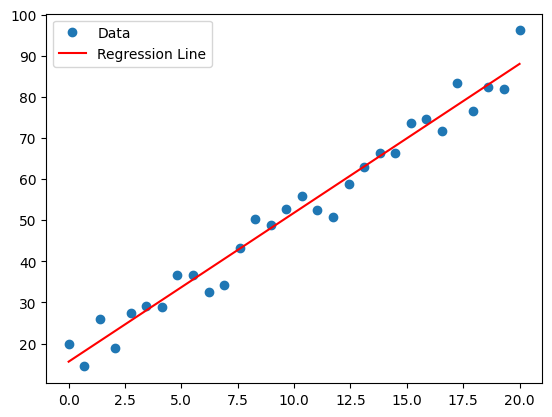

Scikit-Learn Slope: 3.622608932822275
Scikit-Learn Intercept: 15.599834732562705


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3.7 * train_x + 14 + 4 * np.random.randn(n_samples)

# Create a linear regression model
model_sklearn = LinearRegression()

# Fit the model
model_sklearn.fit(train_x.reshape(-1, 1), train_y)

# Get the slope and intercept
slope_sklearn = model_sklearn.coef_[0]
intercept_sklearn = model_sklearn.intercept_

# Plot the data and regression line
plt.plot(train_x, train_y, 'o', label='Data')
plt.plot(train_x, slope_sklearn * train_x + intercept_sklearn, label='Regression Line', color='red')
plt.legend()
plt.show()

print("Scikit-Learn Slope:", slope_sklearn)
print("Scikit-Learn Intercept:", intercept_sklearn)


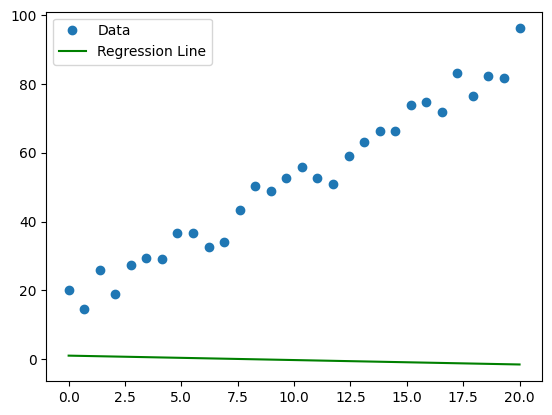

Keras Slope: -0.12868577
Keras Intercept: 0.9610518


In [ ]:
import tensorflow as tf

# Define a Keras model
model_keras = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Input layer with one feature
    tf.keras.layers.Dense(1)  # Output layer with one neuron
])

# Compile the model with the specified loss and optimizer
model_keras.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_keras.fit(train_x, train_y, epochs=1000, verbose=0)

# Get the trained slope and intercept
slope_keras, intercept_keras = model_keras.get_weights()
slope_keras = slope_keras[0, 0]
intercept_keras = intercept_keras[0]

# Plot the data and regression line
plt.plot(train_x, train_y, 'o', label='Data')
plt.plot(train_x, slope_keras * train_x + intercept_keras, label='Regression Line', color='green')
plt.legend()
plt.show()

print("Keras Slope:", slope_keras)
print("Keras Intercept:", intercept_keras)


In [ ]:
# Homework 5

In [ ]:
import numpy as np

# Define the cost function
def cost_function(x, y):
    return -np.sqrt(25 - (x - 2)**2 - (y - 3)**2)

# Define the partial derivatives of the cost function
def gradient(x, y):
    dz_dx = (x - 2) / np.sqrt(25 - (x - 2)**2 - (y - 3)**2)
    dz_dy = (y - 3) / np.sqrt(25 - (x - 2)**2 - (y - 3)**2)
    return dz_dx, dz_dy

# Gradient Descent parameters
learning_rate = 0.01
epsilon = 0.000001  # Convergence criterion
x = 0  # Initial value for x
y = 0  # Initial value for y
steps = 0  # Initialize the step counter

# Gradient Descent loop
while True:
    dz_dx, dz_dy = gradient(x, y)
    x_new = x - learning_rate * dz_dx
    y_new = y - learning_rate * dz_dy
    increment_x = abs(x_new - x)
    increment_y = abs(y_new - y)
    x, y = x_new, y_new
    steps += 1
    if increment_x < epsilon and increment_y < epsilon:
        break

# Minimum values of x and y
min_x = x
min_y = y

print(f"Minimum value of x: {min_x}")
print(f"Minimum value of y: {min_y}")
print(f"Number of steps needed for convergence: {steps}")


Minimum value of x: 1.9996679934203967
Minimum value of y: 2.999501990130597
Number of steps needed for convergence: 4277


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3.7 * train_x + 14 + 4 * np.random.randn(n_samples)

# Linear regression using Scikit-Learn
sklearn_model = LinearRegression()
sklearn_model.fit(train_x.reshape(-1, 1), train_y)
sklearn_coef = sklearn_model.coef_[0]
sklearn_intercept = sklearn_model.intercept_

# Gradient Descent parameters
learning_rate = 0.01
num_iterations = 1000

# Initialize coefficients and intercept
coef = 0
intercept = 0

# Gradient Descent algorithm
for iteration in range(num_iterations):
    y_pred = coef * train_x + intercept
    error = y_pred - train_y
    gradient_coef = (2 / n_samples) * np.sum(error * train_x)
    gradient_intercept = (2 / n_samples) * np.sum(error)
    coef -= learning_rate * gradient_coef
    intercept -= learning_rate * gradient_intercept

# Compare with Scikit-Learn's results
print("Scikit-Learn Coefficient:", sklearn_coef)
print("Scikit-Learn Intercept:", sklearn_intercept)
print("Gradient Descent Coefficient:", coef)
print("Gradient Descent Intercept:", intercept)


Scikit-Learn Coefficient: 3.882152657683109
Scikit-Learn Intercept: 12.288680127489549
Gradient Descent Coefficient: -1.1895482149518291e+238
Gradient Descent Intercept: -8.787326210468366e+236


In [ ]:
#HM6 Momentum algorithm

In [ ]:
import numpy as np

# Cost function
def cost_function(x, y):
    return -np.sqrt(25 - (x - 2)**2 - (y - 3)**2)

# Gradient of the cost function
def gradient(x, y):
    dz_dx = (x - 2) / np.sqrt(25 - (x - 2)**2 - (y - 3)**2)
    dz_dy = (y - 3) / np.sqrt(25 - (x - 2)**2 - (y - 3)**2)
    return dz_dx, dz_dy

# Hyperparameters
learning_rate = 0.01
momentum = 0.9
epsilon = 1e-6

# Initial values for x and y
x, y = 0, 0

# Initial momentum values
vx, vy = 0, 0

# Number of steps
steps = 0

while True:
    steps += 1

    # Calculate gradient
    dz_dx, dz_dy = gradient(x, y)

    # Update momentum
    vx = momentum * vx - learning_rate * dz_dx
    vy = momentum * vy - learning_rate * dz_dy

    # Update x and y
    x += vx
    y += vy

    # Check for convergence
    if abs(vx) < epsilon and abs(vy) < epsilon:
        break

# Print the results
print(f"Minimum at (x, y): ({x}, {y})")
print(f"Number of steps to converge: {steps}")


Minimum at (x, y): (1.9999757683338892, 2.9999636525008326)
Number of steps to converge: 425


In [ ]:
# Hyperparameters for GD
learning_rate_gd = 0.01

# Initial values for x and y
x_gd, y_gd = 0, 0

# Number of steps for GD
steps_gd = 0

while True:
    steps_gd += 1

    # Calculate gradient
    dz_dx, dz_dy = gradient(x_gd, y_gd)

    # Update x and y using GD
    x_gd -= learning_rate_gd * dz_dx
    y_gd -= learning_rate_gd * dz_dy

    # Check for convergence
    if abs(learning_rate_gd * dz_dx) < epsilon and abs(learning_rate_gd * dz_dy) < epsilon:
        break

# Print the results for GD
print(f"Minimum at (x, y) using GD: ({x_gd}, {y_gd})")
print(f"Number of steps to converge using GD: {steps_gd}")


Minimum at (x, y) using GD: (1.9996679934203967, 2.999501990130597)
Number of steps to converge using GD: 4277


In [ ]:
# HM 7
#convolution operation in Python
# loading the libraries
from scipy import signal as sg


In [ ]:
# 2 diemnsional covolution
I = [[97, 52, 99, 62, 69, 45, 70],
     [99,14, 60, 50, 74, 45, 22],
     [59,72,74,14, 74, 100, 28],
     [28, 8, 47, 85, 2, 88, 77],
     [74, 6, 30, 87, 49, 22, 43],
     [86, 87, 4, 53, 36, 10, 46],
     [54, 7, 67, 23, 29, 26, 15]]

g= [[1,2,1],
    [2,4,2],
    [1,2,1]]

In [ ]:
sg.convolve(I,g)


array([[  97,  246,  300,  312,  292,  245,  229,  185,   70],
       [ 293,  704,  787,  808,  818,  733,  644,  459,  162],
       [ 354,  860,  951,  914,  936,  993,  903,  519,  142],
       [ 245,  656,  832,  839,  805,  944, 1045,  643,  155],
       [ 189,  472,  575,  761,  867,  823,  948,  748,  225],
       [ 262,  631,  587,  641,  871,  726,  629,  560,  209],
       [ 300,  787,  779,  613,  687,  584,  436,  368,  150],
       [ 194,  489,  534,  476,  430,  349,  294,  214,   76],
       [  54,  115,  135,  164,  142,  107,   96,   56,   15]])

In [ ]:
sg.convolve(I,g,'valid')

array([[ 951,  914,  936,  993,  903],
       [ 832,  839,  805,  944, 1045],
       [ 575,  761,  867,  823,  948],
       [ 587,  641,  871,  726,  629],
       [ 779,  613,  687,  584,  436]])

In [ ]:
#convolution operation in tensorflow
import tensorflow as tf
print (tf.__version__)

2.14.0


In [ ]:
import tensorflow as tf

input_list = tf.constant([
    [97., 52., 99, 62, 69, 45, 70],
    [99, 14, 60, 50, 74, 45, 22],
    [59, 72, 74, 14, 74, 100, 28],
    [28, 8, 47, 85, 2, 88, 77],
    [74, 6, 30, 87, 49, 22, 43],
    [86, 87, 4, 53, 36, 10, 46],
    [54, 7, 67, 23, 29, 26, 15]])

# stick with 1x7X7X1
input = tf.reshape(input_list[0:7, 0:7], [1, 7, 7, 1])

print("Shape of the reshaped input:", input.shape)


Shape of the reshaped input: (1, 7, 7, 1)


In [ ]:
print(input)
print(input.shape)

tf.Tensor(
[[[[ 97.]
   [ 52.]
   [ 99.]
   [ 62.]
   [ 69.]
   [ 45.]
   [ 70.]]

  [[ 99.]
   [ 14.]
   [ 60.]
   [ 50.]
   [ 74.]
   [ 45.]
   [ 22.]]

  [[ 59.]
   [ 72.]
   [ 74.]
   [ 14.]
   [ 74.]
   [100.]
   [ 28.]]

  [[ 28.]
   [  8.]
   [ 47.]
   [ 85.]
   [  2.]
   [ 88.]
   [ 77.]]

  [[ 74.]
   [  6.]
   [ 30.]
   [ 87.]
   [ 49.]
   [ 22.]
   [ 43.]]

  [[ 86.]
   [ 87.]
   [  4.]
   [ 53.]
   [ 36.]
   [ 10.]
   [ 46.]]

  [[ 54.]
   [  7.]
   [ 67.]
   [ 23.]
   [ 29.]
   [ 26.]
   [ 15.]]]], shape=(1, 7, 7, 1), dtype=float32)
(1, 7, 7, 1)


In [ ]:
#definin the filter
#Goussian filter
filter_list = tf.constant ([
    [1.,2.,1.],
    [2,4,2],
    [1,2,1]])
filter_list.shape
filter = tf.reshape(filter_list,[3,3,1,1])

In [ ]:
print(filter)
print(filter.shape)

tf.Tensor(
[[[[1.]]

  [[2.]]

  [[1.]]]


 [[[2.]]

  [[4.]]

  [[2.]]]


 [[[1.]]

  [[2.]]

  [[1.]]]], shape=(3, 3, 1, 1), dtype=float32)
(3, 3, 1, 1)


In [ ]:

# Perform convolution with 'VALID' padding
op1_valid = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')

# Perform convolution with 'SAME' padding
op1_same = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

print("Shape of the 'VALID' convolution result:", op1_valid.shape)
print("Shape of the 'SAME' convolution result:", op1_same.shape)


Shape of the 'VALID' convolution result: (1, 5, 5, 1)
Shape of the 'SAME' convolution result: (1, 7, 7, 1)


In [ ]:
print(op1_valid)

tf.Tensor(
[[[[ 951.]
   [ 914.]
   [ 936.]
   [ 993.]
   [ 903.]]

  [[ 832.]
   [ 839.]
   [ 805.]
   [ 944.]
   [1045.]]

  [[ 575.]
   [ 761.]
   [ 867.]
   [ 823.]
   [ 948.]]

  [[ 587.]
   [ 641.]
   [ 871.]
   [ 726.]
   [ 629.]]

  [[ 779.]
   [ 613.]
   [ 687.]
   [ 584.]
   [ 436.]]]], shape=(1, 5, 5, 1), dtype=float32)


In [ ]:
print(op1_same)

tf.Tensor(
[[[[ 704.]
   [ 787.]
   [ 808.]
   [ 818.]
   [ 733.]
   [ 644.]
   [ 459.]]

  [[ 860.]
   [ 951.]
   [ 914.]
   [ 936.]
   [ 993.]
   [ 903.]
   [ 519.]]

  [[ 656.]
   [ 832.]
   [ 839.]
   [ 805.]
   [ 944.]
   [1045.]
   [ 643.]]

  [[ 472.]
   [ 575.]
   [ 761.]
   [ 867.]
   [ 823.]
   [ 948.]
   [ 748.]]

  [[ 631.]
   [ 587.]
   [ 641.]
   [ 871.]
   [ 726.]
   [ 629.]
   [ 560.]]

  [[ 787.]
   [ 779.]
   [ 613.]
   [ 687.]
   [ 584.]
   [ 436.]
   [ 368.]]

  [[ 489.]
   [ 534.]
   [ 476.]
   [ 430.]
   [ 349.]
   [ 294.]
   [ 214.]]]], shape=(1, 7, 7, 1), dtype=float32)


In [ ]:
from ast import increment_lineno
# convolution of an image in python
#load libraries
#read an image  and apply filter to that
# Import necessary libraries
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 02 Rice.png to 02 Rice (2).png


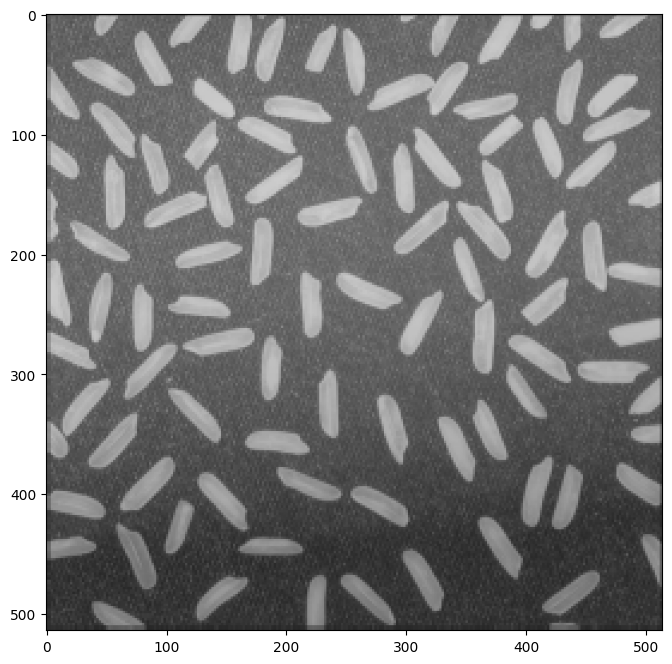

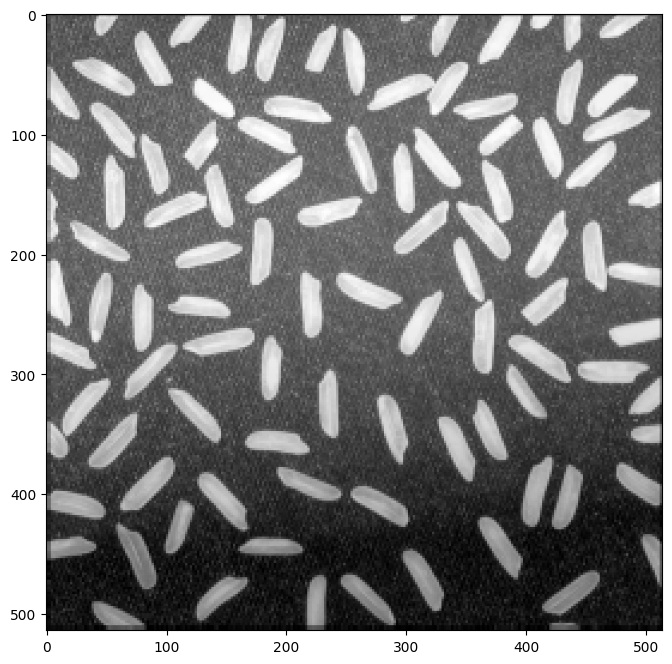

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load your image
im = Image.open('/content/02 Rice (2).png')

# Display the original image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(im, cmap='gray')

# Convert the image to grayscale
image_gr = im.convert("L")

# Convert the grayscale image to a NumPy array
arr = np.asarray(image_gr)

# Display the grayscale image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(arr, cmap='gray')
plt.show()



In [ ]:
#apply conv operation on the image
#Laplacian Filter 1
kernel = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

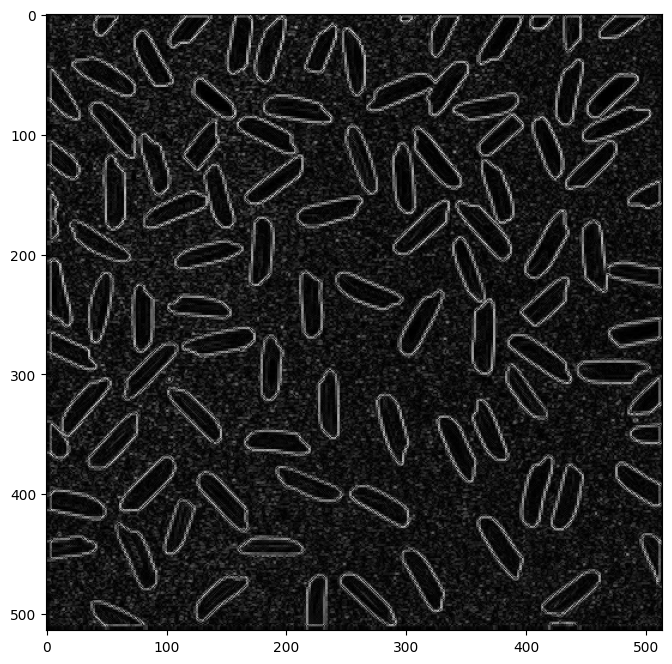

In [ ]:
 #Apply convolution using the kernel
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

# Display the absolute gradient magnitude
fig, aux = plt.subplots(figsize=(8, 8))
aux.imshow(np.abs(grad), cmap='gray')
plt.show()

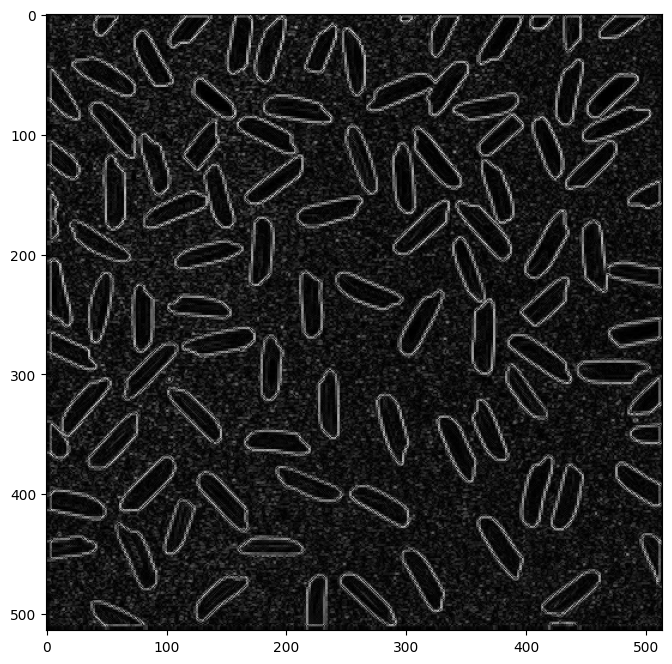

In [ ]:
#all together laplacian filter 2

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image

# Load your image
im = Image.open('/content/02 Rice (2).png')

# Convert the image to grayscale
image_gr = im.convert("L")

# Convert the grayscale image to a NumPy array
arr = np.asarray(image_gr)

# Define your convolution kernel (replace it with your desired kernel)
kernel = np.array([[1, 1, 1],
                   [1,-8, 1],
                   [1, 1, 1]])

# Apply convolution using the kernel
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

# Display the absolute gradient magnitude
fig, aux = plt.subplots(figsize=(8, 8))
aux.imshow(np.abs(grad), cmap='gray')
plt.show()


In [ ]:
#apply conv operation on the image
#Laplacian Filter 3
kernel = np.array([
    [0,1,0],
    [1,-5,1],
    [0,1,0]
])

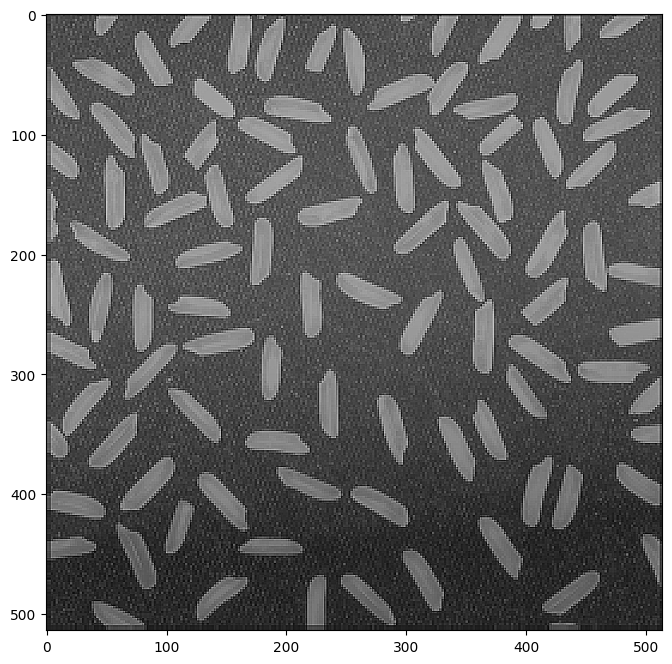

In [ ]:
#Apply convolution using the kernel
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

# Display the absolute gradient magnitude
fig, aux = plt.subplots(figsize=(8, 8))
aux.imshow(np.abs(grad), cmap='gray')
plt.show()

In [ ]:
#apply conv operation on the image
#Laplacian Filter 3
kernel = np.array([
    [0,1,0],
    [1,-9,1],
    [0,1,0]
])

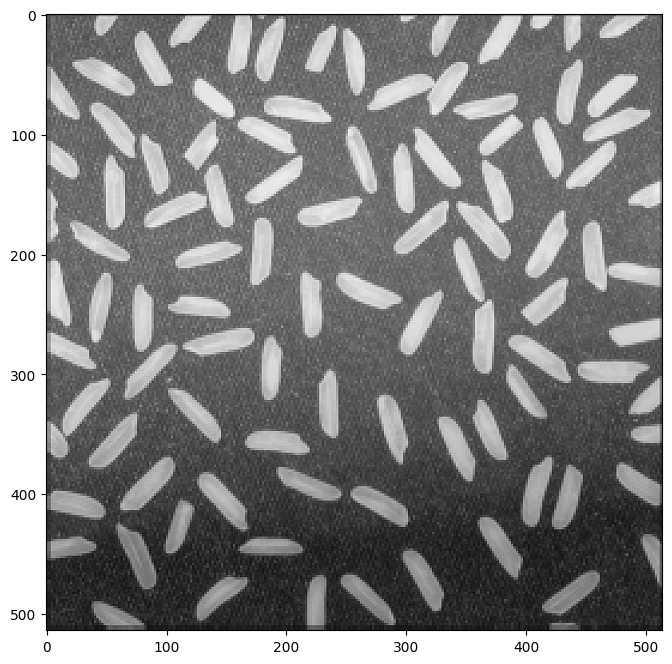

In [ ]:
#Apply convolution using the kernel
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

# Display the absolute gradient magnitude
fig, aux = plt.subplots(figsize=(8, 8))
aux.imshow(np.abs(grad), cmap='gray')
plt.show()

In [ ]:
#Problem 3 apply 4 filters in CV2
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)


4.8.0


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 02 Rice.png to 02 Rice (3).png


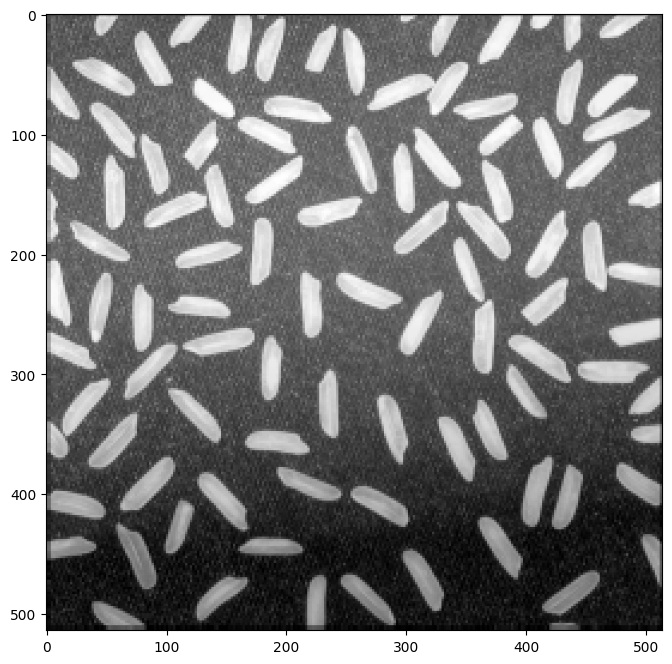

In [ ]:
img = cv2.imread('/content/02 Rice (2).png',0)
fig, aux = plt.subplots(figsize=(8,8))
aux.imshow(img, cmap='gray')



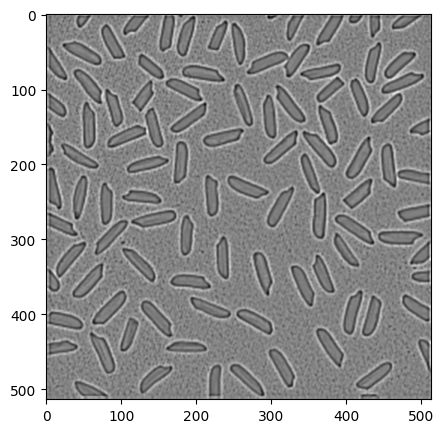

In [ ]:
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=11)
fig, aux = plt.subplots(figsize=(5,5))
aux.imshow(laplacian, cmap='gray')


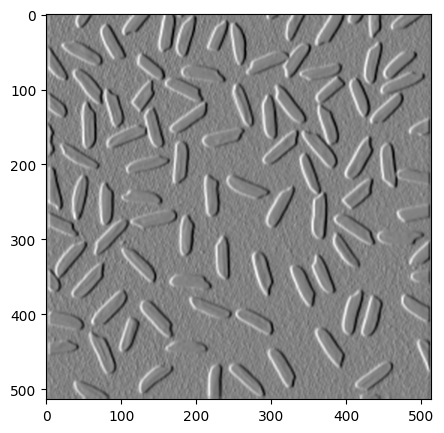

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7)

fig, aux, = plt.subplots(figsize=(5,5))
aux.imshow(sobelx, cmap='gray')


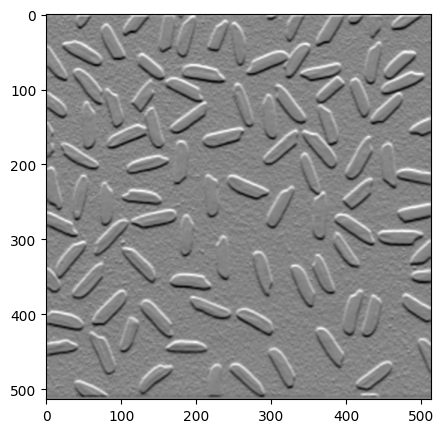

In [ ]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7)

fig, aux, = plt.subplots(figsize=(5,5))
aux.imshow(sobely, cmap='gray')


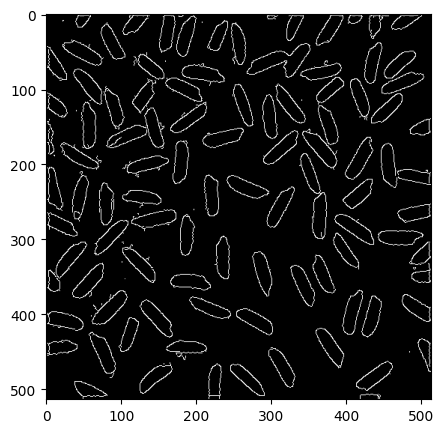

In [ ]:
canny = cv2.Canny(img,50,200)
fig, aux = plt.subplots(figsize=(5,5))
aux.imshow(canny, cmap='gray')


In [ ]:
#HM 8

In [ ]:
n = 30
fib = [1,1]
for i in range(2, n+1):
  fib.append(fib[i-1]+ fib[i-2])

print(fib)


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# Function to generate Fibonacci numbers
def Fibonacci(n):
    if n < 0:
        print("Incorrect input")
    elif n == 1:
        return [1]
    elif n == 2:
        return [1, 1]
    else:
        fib_sequence = [1, 1]
        for i in range(2, n):
            fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])
        return fib_sequence

# Generate the Fibonacci sequence
n = 30
fibonacci_numbers = Fibonacci(n)
fibonacci_numbers = np.array(fibonacci_numbers)

# Reshape the input data to have 2 dimensions
fibonacci_numbers = fibonacci_numbers.reshape(-1, 1)

# Define the autoencoder model
def autoencoder(hidden_layer_neurons):
    input_data = Input(shape=(1,))
    encoded = Dense(hidden_layer_neurons, activation='relu')(input_data)
    decoded = Dense(1, activation='linear')(encoded)

    autoencoder_model = Model(inputs=input_data, outputs=decoded)
    autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder_model

# Train the autoencoder for different counts of neurons in the hidden layer
for neurons_count in range(2, 21):
    model = autoencoder(neurons_count)
    model.fit(fibonacci_numbers, fibonacci_numbers, epochs=100, batch_size=5, shuffle=True, verbose=0)

    # Predict the output
    predicted_output = model.predict(fibonacci_numbers)

    # Compute RMSE
    rmse = np.sqrt(np.mean(np.square(predicted_output - fibonacci_numbers)))

    print(f"Neurons in Hidden Layer: {neurons_count}, RMSE: {rmse}")


1/1 [==============================] - 0s 72ms/step
Neurons in Hidden Layer: 2, RMSE: 51054.749223130544
1/1 [==============================] - 0s 214ms/step
Neurons in Hidden Layer: 3, RMSE: 200431.68709072185
1/1 [==============================] - 0s 57ms/step
Neurons in Hidden Layer: 4, RMSE: 192065.97664948416
1/1 [==============================] - 0s 52ms/step
Neurons in Hidden Layer: 5, RMSE: 36115.9310494147
1/1 [==============================] - 0s 49ms/step
Neurons in Hidden Layer: 6, RMSE: 8418.315770931275
1/1 [==============================] - 0s 54ms/step
Neurons in Hidden Layer: 7, RMSE: 92733.11631234961
1/1 [==============================] - 0s 73ms/step
Neurons in Hidden Layer: 8, RMSE: 82.89888205994343
1/1 [==============================] - 0s 51ms/step
Neurons in Hidden Layer: 9, RMSE: 115940.3334245349
1/1 [==============================] - 0s 51ms/step
Neurons in Hidden Layer: 10, RMSE: 33751.60893154168
1/1 [==============================] - 0s 51ms/step
Neurons 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to generate the first 20 Fibonacci numbers
def generate_fibonacci(n):
    fibonacci_sequence = [0, 1]
    for i in range(2, n):
        fibonacci_sequence.append(fibonacci_sequence[-1] + fibonacci_sequence[-2])
    return np.array(fibonacci_sequence)

# Generate the first 20 Fibonacci numbers
fibonacci_numbers = generate_fibonacci(20)

# Normalizing the data (optional but can help with training)
fibonacci_numbers = fibonacci_numbers / max(fibonacci_numbers)

# Reshape the data for Keras input
fibonacci_numbers = fibonacci_numbers.reshape(-1, 1)

# Function to create and train the autoencoder
def train_autoencoder(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(1,)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(fibonacci_numbers, fibonacci_numbers, epochs=1000, verbose=0)
    return model

# Function to compute RMSE
def compute_rmse(model, data):
    predictions = model.predict(data)
    rmse = np.sqrt(np.mean(np.square(predictions - data)))
    return rmse

# Iterate through different counts of hidden layer neurons
for neurons in range(2, 21):
    model = train_autoencoder(neurons)
    rmse = compute_rmse(model, fibonacci_numbers)
    print(f'Neurons: {neurons}, RMSE: {rmse}')


1/1 [==============================] - 1s 573ms/step
Neurons: 2, RMSE: 3.167660218156181e-07
1/1 [==============================] - 0s 76ms/step
Neurons: 3, RMSE: 4.227490397911434e-05
1/1 [==============================] - 0s 74ms/step
Neurons: 4, RMSE: 1.6991667207587008e-05
1/1 [==============================] - 0s 69ms/step
Neurons: 5, RMSE: 0.00010519049930541764


1/1 [==============================] - 0s 50ms/step
Neurons: 6, RMSE: 0.004529745729693595


1/1 [==============================] - 0s 62ms/step
Neurons: 7, RMSE: 0.2525263833843168
1/1 [==============================] - 0s 70ms/step
Neurons: 8, RMSE: 0.0013822826088984287
1/1 [==============================] - 0s 51ms/step
Neurons: 9, RMSE: 0.0004688991165943104
1/1 [==============================] - 0s 48ms/step
Neurons: 10, RMSE: 3.1838072933661676e-05
1/1 [==============================] - 0s 69ms/step
Neurons: 11, RMSE: 0.002306715768697701
1/1 [==============================] - 0s 62ms/step
Neurons: 12, RMSE: 0.0038899974348108744
1/1 [==============================] - 0s 82ms/step
Neurons: 13, RMSE: 5.1166741210911866e-05
1/1 [==============================] - 0s 52ms/step
Neurons: 14, RMSE: 0.00015782412615007935
1/1 [==============================] - 0s 59ms/step
Neurons: 15, RMSE: 0.00032185670632879133
1/1 [==============================] - 0s 81ms/step
Neurons: 16, RMSE: 0.0023708391057118794
1/1 [==============================] - 0s 47ms/step
Neurons: 17, RMSE: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# Function to generate Fibonacci numbers
def Fibonacci(n):
    if n < 0:
        print("Incorrect input")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return Fibonacci(n-1) + Fibonacci(n-2)

# Generating the input data (first 20 Fibonacci numbers)
fibonacci_numbers = [Fibonacci(i) for i in range(1, 21)]
fibonacci_numbers = np.array(fibonacci_numbers)

# Reshape the input data to have 2 dimensions
fibonacci_numbers = fibonacci_numbers.reshape(-1, 1)

# Define the autoencoder model
def autoencoder(hidden_layer_neurons):
    input_data = Input(shape=(1,))
    encoded = Dense(hidden_layer_neurons, activation='relu')(input_data)
    decoded = Dense(1, activation='linear')(encoded)

    autoencoder_model = Model(inputs=input_data, outputs=decoded)
    autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder_model

# Train the autoencoder for different counts of neurons in the hidden layer
for neurons_count in range(2, 21):
    model = autoencoder(neurons_count)
    model.fit(fibonacci_numbers, fibonacci_numbers, epochs=100, batch_size=5, shuffle=True, verbose=0)

    # Predict the output
    predicted_output = model.predict(fibonacci_numbers)

    # Compute RMSE
    rmse = np.sqrt(np.mean(np.square(predicted_output - fibonacci_numbers)))

    print(f"Neurons in Hidden Layer: {neurons_count}, RMSE: {rmse}")


1/1 [==============================] - 0s 47ms/step
Neurons in Hidden Layer: 2, RMSE: 1189.0622199535883
1/1 [==============================] - 0s 49ms/step
Neurons in Hidden Layer: 3, RMSE: 1529.139464651758
1/1 [==============================] - 0s 49ms/step
Neurons in Hidden Layer: 4, RMSE: 72.13938278104594
1/1 [==============================] - 0s 58ms/step
Neurons in Hidden Layer: 5, RMSE: 1530.419173688823
1/1 [==============================] - 0s 73ms/step
Neurons in Hidden Layer: 6, RMSE: 1193.1889174827886
1/1 [==============================] - 0s 48ms/step
Neurons in Hidden Layer: 7, RMSE: 193.4739330269907
1/1 [==============================] - 0s 49ms/step
Neurons in Hidden Layer: 8, RMSE: 410.1743281724563
1/1 [==============================] - 0s 46ms/step
Neurons in Hidden Layer: 9, RMSE: 47.93518414288666
1/1 [==============================] - 0s 46ms/step
Neurons in Hidden Layer: 10, RMSE: 59.805747944217664
1/1 [==============================] - 0s 50ms/step
Neurons 

Epoch 1/50
1/1 [==============================] - 1s 904ms/step - loss: 0.0459
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0458
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0451
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0426
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0390
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0347
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0298
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0246
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0196
Epoch 10/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0153
Epoch 11/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0117
Epoch 12/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0089
Epoch 13/50
1/1 [==============================] - 0s 22ms/s

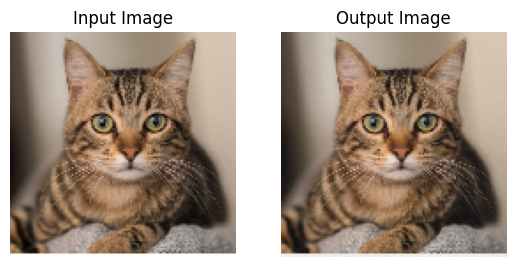

Epoch 1/50
1/1 [==============================] - 1s 747ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0459
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0458
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0458
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0457
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0457
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0456
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0455
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0455
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0454
Epoch 12/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0454
Epoch 13/50
1/1 [==============================] - 0s 26ms/s

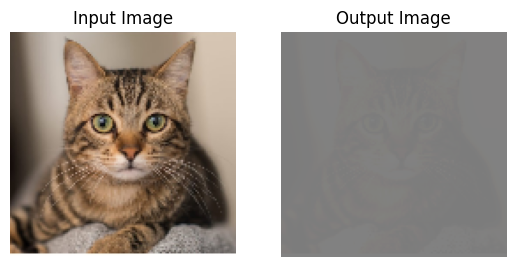

Epoch 1/50
1/1 [==============================] - 1s 555ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0458
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0458
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0435
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0399
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0358
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0312
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0261
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0210
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0163
Epoch 11/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0124
Epoch 12/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0094
Epoch 13/50
1/1 [==============================] - 0s 25ms/s

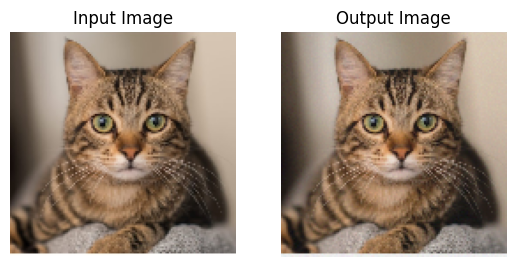

Epoch 1/50
1/1 [==============================] - 1s 630ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0459
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0458
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0458
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0457
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0457
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0456
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0455
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0455
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0454
Epoch 12/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0454
Epoch 13/50
1/1 [==============================] - 0s 22ms/s

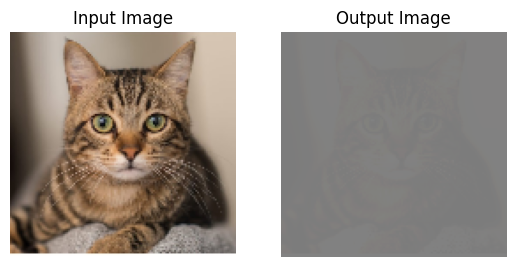

Epoch 1/50
1/1 [==============================] - 1s 531ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0459
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0458
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0458
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0457
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0457
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0456
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0455
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0455
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0454
Epoch 12/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0454
Epoch 13/50
1/1 [==============================] - 0s 31ms/s

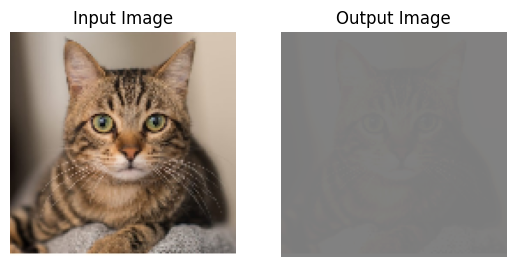

Epoch 1/50
1/1 [==============================] - 1s 796ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0459
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0458
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0458
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0457
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0457
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0456
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0455
Epoch 10/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0455
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0454
Epoch 12/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0454
Epoch 13/50
1/1 [==============================] - 0s 22ms/s

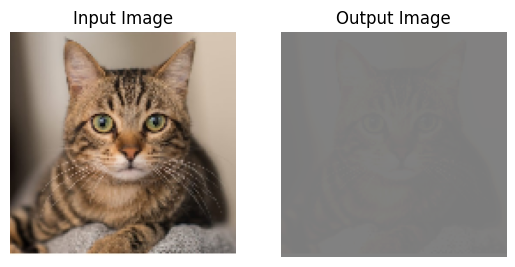

Epoch 1/50
1/1 [==============================] - 1s 917ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0451
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0432
Epoch 5/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0398
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0351
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0300
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0247
Epoch 9/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0197
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0153
Epoch 11/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0117
Epoch 12/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0089
Epoch 13/50
1/1 [==============================] - 0s 32ms/s

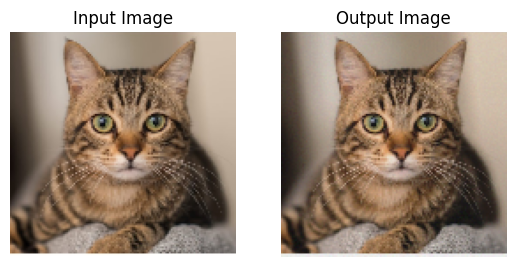

Epoch 1/50
1/1 [==============================] - 1s 788ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0453
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0442
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0422
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0394
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0360
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0322
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0283
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0243
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0205
Epoch 12/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0170
Epoch 13/50
1/1 [==============================] - 0s 25ms/s

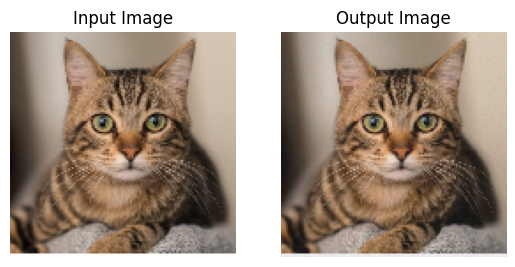

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0454
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0441
Epoch 5/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0420
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0392
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0358
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0321
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0281
Epoch 10/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0242
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0204
Epoch 12/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0169
Epoch 13/50
1/1 [==============================] - 0s 25ms/step

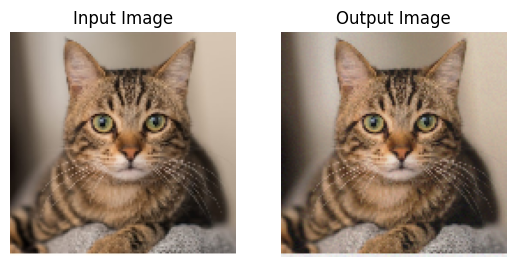

Epoch 1/50
1/1 [==============================] - 1s 942ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0459
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 0.0456
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0448
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0432
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0406
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0374
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0339
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0301
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0261
Epoch 11/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0223
Epoch 12/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0187
Epoch 13/50
1/1 [==============================] - 0s 39ms/s

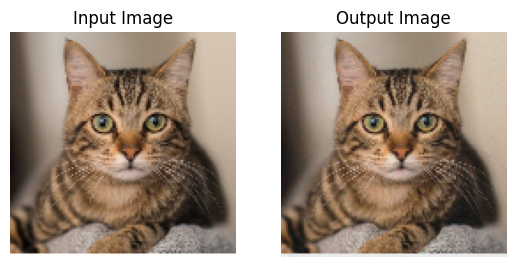

Epoch 1/50
1/1 [==============================] - 1s 863ms/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 0.0458
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0451
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0424
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0385
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0340
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0291
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0239
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0190
Epoch 10/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0148
Epoch 11/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0113
Epoch 12/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0085
Epoch 13/50
1/1 [==============================] - 0s 30ms/s

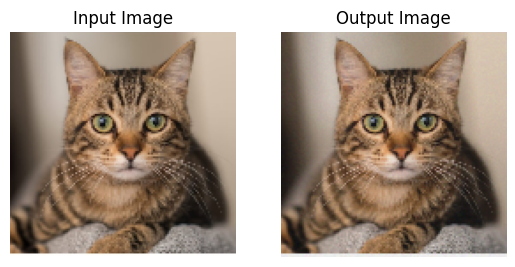

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the input image
input_image_path = '/content/cat.jpg'
target_size = (128, 128)
input_img = load_img(input_image_path, target_size=target_size)
input_array = img_to_array(input_img)
input_array = input_array / 255.0  # Normalize pixel values to the range [0, 1]
input_array = np.reshape(input_array, (1, target_size[0], target_size[1], 3))

# Function to create and train the autoencoder
def train_autoencoder(neurons, epochs):
    model = Sequential()
    model.add(Flatten(input_shape=(target_size[0], target_size[1], 3)))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(target_size[0] * target_size[1] * 3, activation='sigmoid'))
    model.add(Reshape((target_size[0], target_size[1], 3)))

    model.compile(optimizer='adam', loss='mse')
    model.fit(input_array, input_array, epochs=epochs, verbose=1)

    return model

# Function to display input and output images
def display_images(input_image, output_image):
    plt.subplot(1, 2, 1)
    plt.title('Input Image')
    plt.imshow(input_image[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Output Image')
    plt.imshow(output_image[0])
    plt.axis('off')

    plt.show()

# Iterate through different counts of hidden layer neurons
for neurons in range(5, 16):
    epochs = 50  # You can adjust the number of epochs
    model = train_autoencoder(neurons, epochs)

    # Generate output image
    output_image = model.predict(input_array)

    # Display input and output images
    display_images(input_array, output_image)


In [ ]:
import numpy as np

# Given histograms
histogram_1 = np.array([35, 36, 45, 95, 24, 15, 6])
histogram_2 = np.array([20, 56, 85, 52, 22, 20, 1])

# Probabilities
prob_1 = histogram_1 / np.sum(histogram_1)
prob_2 = histogram_2 / np.sum(histogram_2)

# a) Entropy of Image-1
entropy_1 = -np.sum(prob_1 * np.log2(prob_1))
print("Entropy of Image-1:", entropy_1)

# b) Cross Entropy of Image-1 with respect to Image-2
cross_entropy_1_2 = -np.sum(prob_1 * np.log2(prob_2))
print("Cross Entropy of Image-1 with respect to Image-2:", cross_entropy_1_2)

# c) Cross Entropy of Image-2 with respect to Image-1
cross_entropy_2_1 = -np.sum(prob_2 * np.log2(prob_1))
print("Cross Entropy of Image-2 with respect to Image-1:", cross_entropy_2_1)

# d) KL Divergence of Image-1 with respect to Image-2
kl_divergence_1_2 = np.sum(prob_1 * np.log2(prob_1 / prob_2))
print("KL Divergence of Image-1 with respect to Image-2:", kl_divergence_1_2)

# e) KL Divergence of Image-2 with respect to Image-1
kl_divergence_2_1 = np.sum(prob_2 * np.log2(prob_2 / prob_1))
print("KL Divergence of Image-2 with respect to Image-1:", kl_divergence_2_1)


Entropy of Image-1: 2.44896831356627
Cross Entropy of Image-1 with respect to Image-2: 2.6790941166588382
Cross Entropy of Image-2 with respect to Image-1: 2.6010413489466506
KL Divergence of Image-1 with respect to Image-2: 0.23012580309256875
KL Divergence of Image-2 with respect to Image-1: 0.2159538097114254


In [ ]:
import numpy as np

histogram_1 = np.array([35, 36, 45, 95, 24, 15, 6])
prob_1 = histogram_1 / 256
entropy_1 = -np.sum(prob_1 * np.log2(prob_1))
print("Entropy of Image-1:", entropy_1)

histogram_2 = np.array([20, 56, 85, 52, 22, 20, 1])
prob_2 = histogram_2 / 256
cross_entropy_1_2 = -np.sum(prob_1 * np.log2(prob_2))
print("Cross Entropy of Image-1 with respect to Image-2:", cross_entropy_1_2)

cross_entropy_2_1 = -np.sum(prob_2 * np.log2(prob_1))
print("Cross Entropy of Image-2 with respect to Image-1:", cross_entropy_2_1)

kl_divergence_1_2 = np.sum(prob_1 * np.log2(prob_1 / prob_2))
print("KL Divergence of Image-1 with respect to Image-2:", kl_divergence_1_2)

kl_divergence_2_1 = np.sum(prob_2 * np.log2(prob_2 / prob_1))
print("KL Divergence of Image-2 with respect to Image-1:", kl_divergence_2_1)


Entropy of Image-1: 2.44896831356627
Cross Entropy of Image-1 with respect to Image-2: 2.6790941166588382
Cross Entropy of Image-2 with respect to Image-1: 2.6010413489466506
KL Divergence of Image-1 with respect to Image-2: 0.23012580309256875
KL Divergence of Image-2 with respect to Image-1: 0.2159538097114254


In [ ]:
# Given histogram for Image-2
histogram_2 = np.array([20, 56, 85, 52, 22, 20, 1])

# Probabilities for Image-2
prob_2 = histogram_2 / np.sum(histogram_2)

# Entropy of Image-2
entropy_2 = -np.sum(prob_2 * np.log2(prob_2))
print("Entropy of Image-2:", entropy_2)


Entropy of Image-2: 2.3850875392352253
